# [Selected Problems in Machine Learning (NPFL097)](https://ufal.mff.cuni.cz/courses/npfl097)

In [77]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import random
from glob import glob
from tqdm import tqdm, tqdm_notebook
import math

In [104]:
with open("data/eng-input.txt", "r") as f:
    data = f.read().replace("\n", "")
    
data = data[:10000]

In [105]:
def cut_words(data, s):
    s_idx = np.where(s)[0] + 1
    N = len(data)

    idx_start = np.hstack([np.array([0]), s_idx])
    idx_end = np.hstack([s_idx, np.array([N])])
            
    words = [data[start:end] for start, end in zip(idx_start, idx_end)]
    
    return words

In [106]:
N = len(data)
s = np.random.randint(0, 2, size=N-2)

" ".join(cut_words(data, s))[:1000]

'o r a l t e rnatively as op pos i nga u t h o rit yin t h e c o nduc t of h u m anrelat i on s p rop onents of an a rc h is mk nown a sa narchi stsadv o ca testat el es s s ocie t i e sas t he onl ymo ra lfo rmofs oc i al organ iz ati o nth e r ea r e m a n y t ypesa n d tradit io n s o f anarc h i sm n otal l of wh i c ha remutua l lyex c lu s iv ea narc hi sts c hoo ls oftho u ghtc an diff erfun da m ent a llysu ppo r t in gan y thin gf r om ext r emeindi vid uali sm t o comp let e c o llect i v i s m anarchism isoftenconsi d e r e dtob e a ra di c all e f tw ing ideo lo g ya ndm u c h o fanarchi st e c o nom ic sa n dana rchis tl ega lphilo so p h y r e f l ectanti s ta t ist i nt e r pr eta t io n s ofco m m un is m c ollect ivi sm s yn d i c alism or p ar t i c i pa t o r yecon omic show eve r a n ar c his m h asalwa y s inc lud ed an i n divi du ali stst rains uppo rting am a r ke t ec on o mya n dpri va t ep ro p e rt y orm or a l lyun re s tr ain e deg o is m s o me ind ivid u

In [108]:
def segmentation(data, alpha = 100, p_c = 0.5, num_iter = 1000):
    N = len(data)
    s = np.random.randint(0, 2, size=N - 2)

    words = cut_words(data, s)

    count = Counter(words)
    word_count = sum(count.values())

    C = len(set(data))

    def P0(w):
        U = 1.0/float(C)

        return U**len(w) * p_c**(len(w)-1)

    def PW(w, a=0, b=0):
        return (alpha * P0(w) + count[w] + a) / (alpha + word_count + b)

    def log_P_data(data, s):
        return sum([np.log(PW(w)) for w in cut_words(data, s)])

    p_data = []
    ss = []

    inner_i = 0

    total_iters = num_iter * (N-2)
    print_every = total_iters // 500

    for iter in tqdm_notebook(range(num_iter)):
        for i in np.random.permutation(N - 2):
            inner_i += 1

            prev_left = 0
            for j in reversed(range(i)):
                if s[j] == 1:
                    prev_left = j
                    break

            next_right = len(s)
            for j in range(i + 1, len(s)):
                if s[j] == 1:
                    next_right = j
                    break

            prev_word = data[prev_left:i]
            next_word = data[i:next_right]
            joined_word = prev_word + next_word

            if s[i] == 0:
                count[joined_word] = max(0, count[joined_word] - 1)
                word_count -= 1
            else:
                count[prev_word] = max(0, count[prev_word] - 1)
                count[next_word] = max(0, count[next_word] - 1)
                word_count -= 2

    #         p0 = (alpha * P0(joined_word) + count[joined_word]) / (alpha + word_count)

    #         a = (alpha * P0(prev_word) + count[prev_word]) / (alpha + word_count)
    #         b = (alpha * P0(next_word) + count[next_word]) / (alpha + word_count + 1)
    #         p1 =  a * b

            p0 = PW(joined_word)
            p1 = PW(prev_word) * PW(next_word, b=1)

    #         assert np.all(np.fromiter(count.values(), dtype=np.int32) >= 0)

            if (random.random() * (p0 + p1)) < p1:
                s[i] = 0
            else:
                s[i] = 1

            if s[i] == 0:
                count[joined_word] += 1
                word_count += 1
            else:
                count[prev_word] += 1
                count[next_word] += 1
                word_count += 2

            if inner_i % print_every == 0:
                p_data.append(log_P_data(data, s))
                ss.append(s.copy())

    return log_P_data(data, s), p_data, ss

segmentation(data, alpha = 100, p_c = 0.5, num_iter = 500)[0]

-43606.19662130174

-40690.27468592248


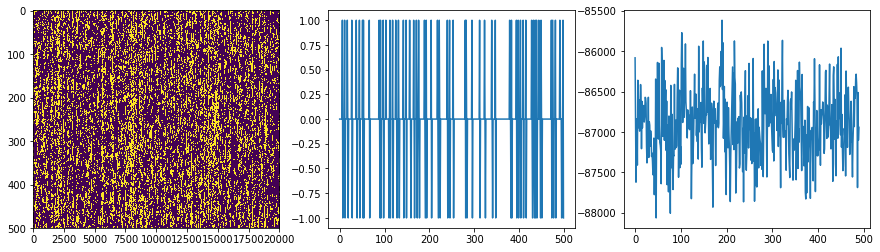

In [109]:
print(log_P_data(data, s))

plt.figure(figsize=(15, 4))
plt.subplot(131)
plt.imshow(np.array(ss), aspect="auto")

plt.subplot(132)
plt.plot(np.sum(ss - np.roll(ss, 1), axis=1))

plt.subplot(133)
plt.plot(p_data[10:])

In [110]:
" ".join(cut_words(data, s))[:2000]

'o r a l t e rnatively as op pos i nga u t h o rit yin t h e c o nduc t of h u m anrelat i on s p rop onents of an a rc h is mk nown a sa narchi stsadv o ca testat el es s s ocie t i e sas t he onl ymo ra lfo rmofs oc i al organ iz ati o nth e r ea r e m a n y t ypesa n d tradit io n s o f anarc h i sm n otal l of wh i c ha remutua l lyex c lu s iv ea narc hi sts c hoo ls oftho u ghtc an diff erfun da m ent a llysu ppo r t in gan y thin gf r om ext r emeindi vid uali sm t o comp let e c o llect i v i s m anarchism isoftenconsi d e r e dtob e a ra di c all e f tw ing ideo lo g ya ndm u c h o fanarchi st e c o nom ic sa n dana rchis tl ega lphilo so p h y r e f l ectanti s ta t ist i nt e r pr eta t io n s ofco m m un is m c ollect ivi sm s yn d i c alism or p ar t i c i pa t o r yecon omic show eve r a n ar c his m h asalwa y s inc lud ed an i n divi du ali stst rains uppo rting am a r ke t ec on o mya n dpri va t ep ro p e rt y orm or a l lyun re s tr ain e deg o is m s o me ind ivid u